In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
wrld_hap = pd.read_csv("C:/Users/kowal/Desktop/Wstep do eksploracyji/wot.csv", encoding='ISO-8859-1')
wrld_hap


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


# 1) Opis zbioru danych

In [4]:
wrld_hap.shape

(2363, 11)

In [5]:
wrld_hap.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

Zbiór danych ma 2363 wiersze i 11 kolumn. Występują w nim zmienne typu object, int64 oraz float64.

# 2) Analiza zmiennych danych

In [8]:
wrld_hap.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


Powyżej zostały policzone statystyki wszystkich zmiennych. Większośc danych w kolumnie year nie ma sensu, ale zostawiłem ją bo użytkownik może odczytać minimalny orazz maksymalny rok.

# 3) Analiza zależności od przynależności do grupy

In [11]:
# średni poziom szczęścia w latach 2005 - 2023

In [26]:
# średnio najszczęśliwsze kraje
srednie_szczescie = wrld_hap.groupby(["Country name"]).agg(Średni_poziom_szczęścia = ("Life Ladder", "mean")).sort_values('Średni_poziom_szczęścia', ascending=False)
srednie_szczescie.head(10)

,Średni_poziom_szczęścia
Country name,
Denmark,7.664111
Finland,7.624062
Iceland,7.468000
Norway,7.463846
Netherlands,7.440412
Switzerland,7.435692
Sweden,7.365167
Canada,7.296833
New Zealand,7.260706


In [27]:
# średnio najmniej szczęśliwe
srednie_szczescie.tail(10)

,Średni_poziom_szczęścia
Country name,
Comoros,3.849625
Lesotho,3.839800
Zimbabwe,3.792333
Togo,3.719667
Tanzania,3.711056
Rwanda,3.654417
Burundi,3.548200
Central African Republic,3.515000
South Sudan,3.402000


# 4) 2 wykresy rozkładów zmiennych

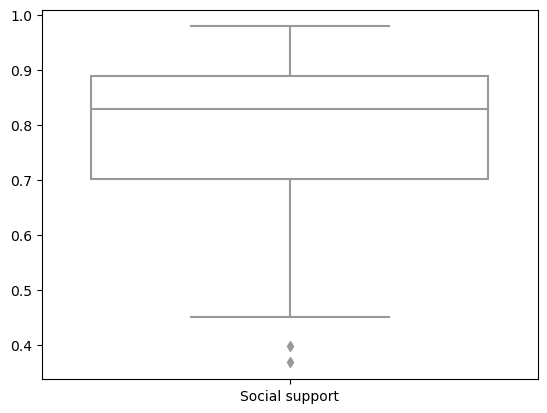

In [13]:
# Rozkład social support 
rok2023 = wrld_hap[wrld_hap["year"] == 2023]["Social support"]
rok2023 = rok2023.to_frame()
sns.boxplot(data=rok2023, color="w")
plt.show()

Jest to boxplot mówiący przedstawiający rozkład Social support dla państw w 2023 roku. Ankietowani udzialali odpowiedzi 0 bądź 1 na pytanie czy mają krewnych lub przyjaciół, na których mogą polegać. Jak widać w większości państw ludzie mogą polegać na swoich bliskich. 75% wyników jest na poziomie większym niż 0.7.

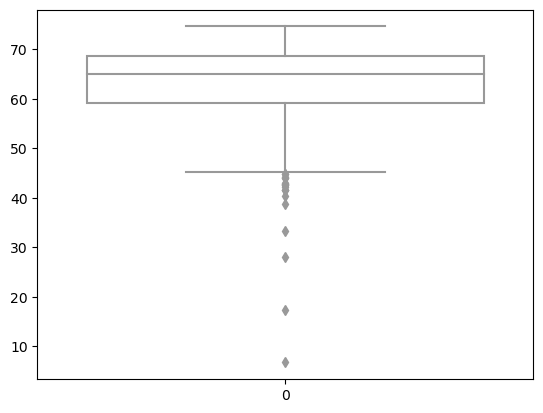

In [16]:
# Rozkład Healthy life expectancy at birth
sns.boxplot(data = wrld_hap["Healthy life expectancy at birth"], color = "w")
plt.show()

In [17]:
wrld_hap[wrld_hap["Healthy life expectancy at birth"]== min(wrld_hap["Healthy life expectancy at birth"])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
818,Haiti,2006,3.754,7.976,0.694,6.72,0.449,0.355,0.854,0.583,0.332


Boxplot ten pokazuje rozkład oczekiwanej długości życia w zdrowiu w chwili urodzenia w latach 2005-2023. Jak widać najwięcej wyników mieści się pomiędzy 60 a 70 latami. Niepokojący wynik 6.72 lat jest najprawdopobniej błędem ramki danych (nie znalazłem w internecie żadnych anomalii dla Haiti w 2006 roku).

# 5) 2 wykresy zależności

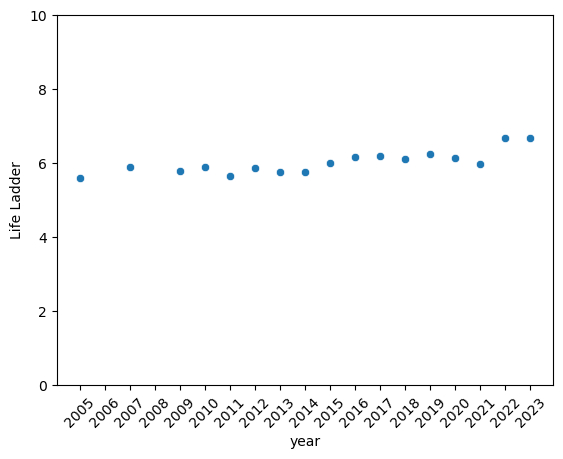

In [18]:
polska_gurom = wrld_hap[wrld_hap["Country name"] == "Poland"]

sns.scatterplot(data=polska_gurom, x='year', y='Life Ladder')
plt.ylim(0, 10)
plt.xticks(range(2005, 2024), rotation = 45)
plt.show()

Jest to wykres zależności średniego poziomu szczęścia od lat. Jak widać w Polsce wiele się nie zmienia, nie ma żadnej ciekawszej zależności. Można powiedzieć, że jest średnio. Ale jak wiemy, jak jest średnio, to jest dobrze.

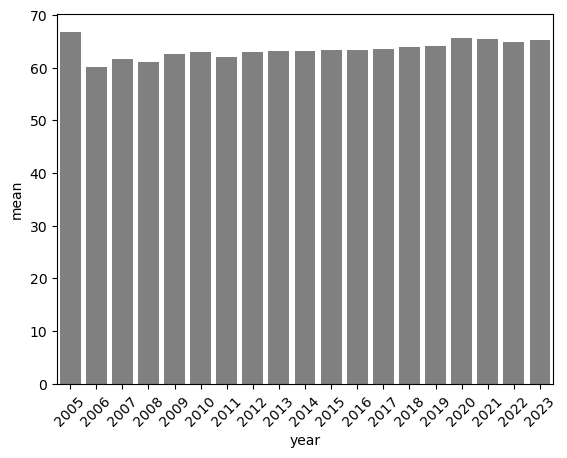

In [25]:
zycko = wrld_hap.groupby(["year"]).agg(mean = ("Healthy life expectancy at birth", 'mean')).reset_index()
sns.barplot(data=zycko, x='year', y='mean', color = 'gray')

plt.xticks(rotation = 45)
plt.show()

Wraz ze wzrostem lat średnia długość życia na świecie wydaje się wzrastać. Wyjątkiem są wyniki z 2005 roku. Nie należy się jednak nimi sugerować. Z 2005 roku mamy dane jedynie dla kilkunastu państw, więc wyniki są mocno przekłamane.